### Coursera Capstone Project

This Jupyter notebook file is for the final Coursera Capstone project as part of the Applied Data Science specialization by IBM. 

For a final assignment, the goal is to come up with an idea to use the provided accident data to predict the various accidents' severity. Important factors are the project validity and relevance towards the community or a group of people. 

For this the **CR**oss **I**ndustry **S**tandard **P**rocess for **D**ata **M**ining (CRISP-DM) approach is used. With CRISP-DM the following 6 steps are used:
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modelling
5. Evaluation
6. Deployment

Week 1: Create GITHUB account and Jupyter notebook file (FINISHED)

Week 2: Create the following (Current)

* A description of the problem and a discussion of the background. (15 marks)
* A description of the data and how it will be used to solve the problem. (15 marks)

Week 3: The final deliverables of the project will be created:

* A link to the Notebook on your Github repository, showing your code. (15 marks)
* A full report consisting of all of the following components (15 marks):
    - Introduction where you discuss the business problem and who would be interested in this project.
    - Data where you describe the data that will be used to solve the problem and the source of the data.
    - Methodology section which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, if any, and what machine learnings were used and why.
    - Results section where you discuss the results.
    - Discussion section where you discuss any observations you noted and any recommendations you can make based on the results.
    - Conclusion section where you conclude the report.
* Own choice of a presentation or blogpost. (10 marks)


In [1]:
# To begin, the following libraries are imported and the CSV data file is loaded.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

source = 'https://raw.githubusercontent.com/BFischer-GH/Coursera_Capstone/master/data/Data-Collisions.csv'
df_raw = pd.read_csv(source, index_col = False)

print('Data-Collisions.csv loaded')


Data-Collisions.csv loaded


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### 1. Introduction / Business Understanding (WEEK 2)

This section will provide a description of the problem and a brief discussion of the background. 

A major worldwide goal is the reduction traffic accidents, to improve road safety. Per example, in 2013 there were 1.25 million deaths around the world caused by traffic accidents. It's likely that this number will increase in the coming years.

By being able to predict accidents and the severity of the accidents before they occur one can enable safer routes, optimize public transport, and improve on infrastructure costs. This has the meets the goal to make roads and travel safer for all.

The goal of this assignment is the prediction of traffic accident severity based on a binairy severity classification of accidents. The severity is classified as property damage (class = 1) or injury (class = 2). By being able to predict the outcome of the severity, one can perhaps develop saver routes (based on time/location), improve ambulance response and look into possible infrastructure problems. Thus the results are relevant for not only drivers themselves but also for public transport officials and first responders. 

A data set is provided and includes almost 195.000 accidents with a binairy severity classification and 37 other attributes. More details regarding the data will be discussed in section 2 Data/Data Understanding.

To summerize, the goal is to investigate a road accident dataset with a binairy severity class and try to predict the severity of an accident, be it property damage or injury, by specific atributes.  

In [ ]:
# 

### 2. Data/ Data Understanding (WEEK 2)

The raw data-file is 194673x38, which entails 194673 accidents with a binary severity classification, (SEVERITYCODE) and 37 additional attributes. The file represents all types of collisions from Jan-2004 to May-2020 in the Seatle (USA) area.

In [2]:
# Script for 2. Data/Data Und. 

# Check info of dataset
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

#### What are useful attributes for modelling?

Next to the severity classification (SEVERITYCODE - 0) there are 37 various attributes. After analysing the provided meta-datafile the following selection is made with grouped related attributes.

**Relevant attributes:**
- Location related attributes: X (1), Y (2), LOCATION (10);
- Accident atributes: SEVERITYDESC (14), COLLISIONTYPE (15), PERSONCOUNT (16), PEDCYLCOUNT (17), PEDCYLCOUNT (18), VEHCOUNT (19), JUNCTIONTYPE (22), SDOT_COLDESC (24), INATTENTIONIND (25), UNDERINFL (26), WEATHER (27), ROADCOND (28), LIGHTCOND (29), PEDROWNOTGRNT (30), SPEEDING (32), ST_COLCODE (33), ST_COLDESC (34), HITPARKEDCAR (37)  
- Time related attributes: INCDATE (20), INCDTTM (21)

All these attributes give some relevant information related to the accident and will be included to model with. This is related to the location of the accident, specifics related to the accident of the time of the accident.

**Non-relevant attributes:**
- (Unique) Keys: OBJECTID (3), INCKEY (4), COLDETDEY (5), REPORTNO (6), INTKEY (9), SDOT_COLCODE (23), SDOTCOLNUM (31), SEGLANEKEY (35), CROSSWALKKEY (36).
All keys are arbitrary numbers that aren't usable for further modelling. 
- None relevant data, incomplete or dublicate data: STATUS (7), ADDRTYPE (8), EXCEPTRSNCODE (11), EXCEPTRSNDESC (12), SEVERITYCODE.1 (13), SEVERITYDESC (14);
All these attributes are deemed not useful to the analysis, because they are not useful to distuingish collisions, are  incomplete or are a duplicate of another attribute. 

All the above non-relevant attributes will be excluded from the data frame, as they hold no useful information or hold incomplete information. 

As many of the remaining attributes are OBJECT types, further investigation is needed if certain attributes are usefull. 

For modelling and validation the cleaned data file will be split in training and testing sets and perhaps for week 3 additional attribute selection may be performed.  

### 3. Data Preparation (WEEK 2)

To clean-up the data frame, all non-relevant attributes are removed. 

In [3]:
# All required script for prep work of 3. Data Prep
df_raw.drop(['OBJECTID','INCKEY'
             ,'COLDETKEY', 'REPORTNO'
             , 'INTKEY','SDOT_COLCODE'
             , 'SDOTCOLNUM' , 'SEGLANEKEY'
             ,'CROSSWALKKEY', 'STATUS'
             , 'ADDRTYPE', 'EXCEPTRSNCODE'
             , 'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC']
            ,axis=1, inplace=True)

print('Non-relevant attributs removed!')

Non-relevant attributs removed!


As a second step all accidents that have no Location or Time attributes are removed. 

In [4]:
df_clean = df_raw.dropna(subset=['X', 'Y', 'LOCATION'
                     ,'INCDATE' ,'INCDTTM'])

print('A total of', (df_raw.shape[0]-df_clean.shape[0]), 'incomplete accidents removed!')
print('A total of', (df_clean.shape[0]), 'accidents remain!')

A total of 5334 incomplete accidents removed!
A total of 189339 accidents remain!


This means we now have a data base of 189339 accidents with a total 24 atributes (including the binairy classifier)

If we then investigate the data for correlation, we don't obtain much information. Many attributes are objects and the correlated values values are relatively low:

In [9]:
df_clean.corr()


,SEVERITYCODE,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT
SEVERITYCODE,1.000000,0.010309,0.017737,0.128866,0.246722,0.214969,-0.058067
X,0.010309,1.000000,-0.160262,0.012887,0.011304,-0.001752,-0.012168
Y,0.017737,-0.160262,1.000000,-0.013850,0.010178,0.026304,0.017058
PERSONCOUNT,0.128866,0.012887,-0.013850,1.000000,-0.024764,-0.040317,0.375640
PEDCOUNT,0.246722,0.011304,0.010178,-0.024764,1.000000,-0.017461,-0.265337
PEDCYLCOUNT,0.214969,-0.001752,0.026304,-0.040317,-0.017461,1.000000,-0.257882
VEHCOUNT,-0.058067,-0.012168,0.017058,0.375640,-0.265337,-0.257882,1.000000


Following this we investigate the OBJECT of the dataframe:

In [10]:
df_clean.describe(include=['object'])

,LOCATION,COLLISIONTYPE,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,ST_COLDESC,HITPARKEDCAR
count,189339,184582,189339,189339,185146,189339,29176,184602,184414,184481,184327,4645,8720,189321,184582,189339
unique,23890,10,5985,157960,7,39,1,4,11,9,9,1,1,115,62,2
top,N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND COR...,Parked Car,2006/11/02 00:00:00+00,11/2/2006,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Y,N,Clear,Dry,Daylight,Y,Y,32,One parked--one moving,N
freq,265,46381,88,88,87390,84538,29176,97639,108959,122076,113582,4645,8720,26650,42869,182334


From this overview addtional information becomes available regarding certain attribute objects. 
- Low Count attributes:
Several attributes have a count that much lower than the amount of collisions. These will be not used.
- High Unique attributes: 
Several attributs have a large unique value, thus including many variables. For this exercise they also will be excluded. A maximum count of 15 is taken. Time related attributes are not included with this.  

Following this a improved dataframe is constructed. 

In [16]:
df_final = df_clean
df_final.drop(['ST_COLDESC','ST_COLCODE', 'SPEEDING', 'PEDROWNOTGRNT', 'INATTENTIONIND'],axis=1, inplace=True)

df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189339 entries, 0 to 194672
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   SEVERITYCODE   189339 non-null  int64  
 1   X              189339 non-null  float64
 2   Y              189339 non-null  float64
 3   LOCATION       189339 non-null  object 
 4   COLLISIONTYPE  184582 non-null  object 
 5   PERSONCOUNT    189339 non-null  int64  
 6   PEDCOUNT       189339 non-null  int64  
 7   PEDCYLCOUNT    189339 non-null  int64  
 8   VEHCOUNT       189339 non-null  int64  
 9   INCDATE        189339 non-null  object 
 10  INCDTTM        189339 non-null  object 
 11  JUNCTIONTYPE   185146 non-null  object 
 12  SDOT_COLDESC   189339 non-null  object 
 13  UNDERINFL      184602 non-null  object 
 14  WEATHER        184414 non-null  object 
 15  ROADCOND       184481 non-null  object 
 16  LIGHTCOND      184327 non-null  object 
 17  HITPARKEDCAR   189339 non-nul

From this we now have a dataframe with 189339 collisions and 18 attributes (1 binairy class and 17 other). The next step is to split up the data in training and test and further investigate the attributes. 

As there are still many OBJECT attributes, further investigation is done by grouping. An example using the weather and roadconditions shown below. More details will follow in the modeling part in week 3. 

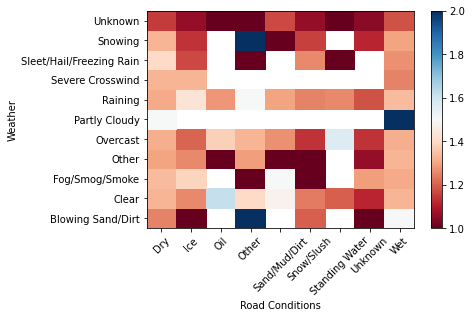

In [21]:
df_gptest = df_clean[['WEATHER','ROADCOND','SEVERITYCODE']]
grouped_test1 = df_gptest.groupby(['WEATHER','ROADCOND'],as_index=False).mean().round(2)
grouped_pivot = grouped_test1.pivot(index='WEATHER',columns='ROADCOND')

fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index
yaxis_label = 'Weather'
xaxis_label = 'Road Conditions'

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)
ax.set_xlabel(xaxis_label)
ax.set_ylabel(yaxis_label)

#rotate label 45 if too long
plt.xticks(rotation=45)

fig.colorbar(im)
plt.show()

### 4. Modeling (WEEK 3)

Build the model, in this case supervised machine learing (see paper)


In [118]:
# All required script for 4. Modeling


(189339, 18)

### 5. Evaluation (WEEK 4)

Check the results if they allow for 1. Bus.Und. to be achieved. Think of R2 rules
Make sure that all is clear why it works or not.

In [4]:
# All script for 5. Evaluation